In [1]:
import numpy as np
import random 
import pandas as pd
import matplotlib.pyplot as plt 

from pathlib import Path
from regression_utils import *

np.set_printoptions(suppress=True)
%matplotlib inline

In [2]:
# convention followed in relation to scikit documentation 
# y = countryQuantity 
# y1 = countryQuantityTrain
# Y = countryQuantityTest
# y_pred = countryQuantityPredict

# X = years 
# X1 = yearsTrain
# x_mis = yearsTest
# x = yearsPredict

# c = combinedZip

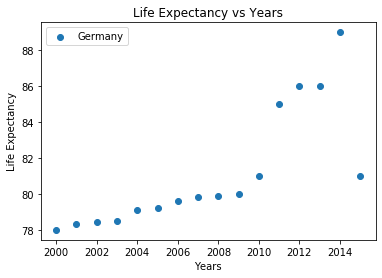

Train:Test split is:  12 : 4


In [3]:
#reading data from csv 
df = pd.read_csv('datasets_12603_17232_Life Expectancy Data.csv')
df.fillna(df.mean(), inplace=True)

# change here 
country = 'Germany'

# extract dataframe for selected country
countryDataFrame = countryDF(country, df)

# Feature 1
countryQuantity = columnExtractor(countryDataFrame,'Life expectancy')

# Feature 2
years = columnExtractor(countryDataFrame,'Year')

# Visualization 
plotQuantities(years, countryQuantity, 'Years', 'Life Expectancy', country, 'Life Expectancy vs Years')

split = np.random.randint(1,15)
countryQuantityTrain, yearsTrain, countryQuantityTest, yearsTest = randomizer(countryQuantity, years, split)


length scale is:  33


/home/mihir/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:357: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


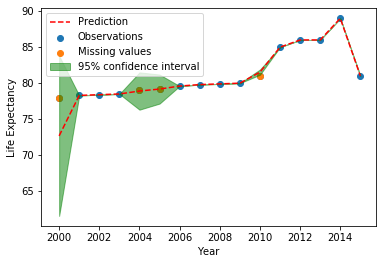

In [4]:
# Gaussian Regression 
countryQuantityPredict, sigma = gaussianRegression(yearsTrain, countryQuantityTrain, yearsTest, countryQuantityTest, years, countryQuantity) 

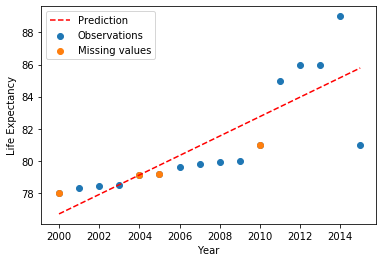

In [5]:
# Linear Regression 
countryQuantityPredictLR = linearRegression(yearsTrain, countryQuantityTrain, yearsTest, countryQuantityTest, years, countryQuantity)

GPR Prediction 
 [[72.68522246 78.3        78.4        78.5        78.90809886 79.1800615
  79.6        79.8        79.9        80.         81.5321688  85.
  86.         86.         89.         81.        ]]
Actual 
 [78.0, 78.3, 78.4, 78.5, 79.1, 79.2, 79.6, 79.8, 79.9, 80.0, 81.0, 85.0, 86.0, 86.0, 89.0, 81.0]
GPR error:  [[6.81381735 0.         0.         0.         0.24260574 0.02517487
  0.         0.         0.         0.         0.65699852 0.
  0.         0.         0.         0.        ]]
mean absolute percentage error GPR :  0.4836622798882387
------------------------------------------
LR Prediction 
 [[76.68446602 77.29126214 77.89805825 78.50485437 79.11165049 79.7184466
  80.32524272 80.93203883 81.53883495 82.14563107 82.75242718 83.3592233
  83.96601942 84.57281553 85.17961165 85.78640777]]
Actual 
 [78.0, 78.3, 78.4, 78.5, 79.1, 79.2, 79.6, 79.8, 79.9, 80.0, 81.0, 85.0, 86.0, 86.0, 89.0, 81.0]
LR error  [[1.68658203 1.28829868 0.64023182 0.00618391 0.01472881 0.6546043
 

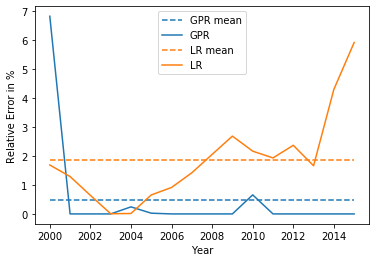

In [6]:
# error computation for GPR 
years = columnExtractor(countryDataFrame,'Year').tolist()
error = errorComputation(countryDataFrame, countryQuantityPredict, 'Life expectancy',regression_type='GPR')
print('GPR error: ',error)
errorPlot(years, error, 'Year', 'Relative Error in %',regression_type='GPR',color='#1f77b4')

print('------------------------------------------')

# error computation for LR 
years = columnExtractor(countryDataFrame,'Year').tolist()
error = errorComputation(countryDataFrame, countryQuantityPredictLR, 'Life expectancy',regression_type='LR')
print('LR error ',error)
errorPlot(years, error, 'Year', 'Relative Error in %',regression_type='LR',color='#ff7f0e')

plt.show()

#go with rmse for outliers 
#try using normalization